<a href="https://colab.research.google.com/github/NazarZhur/KSVD/blob/main/%D0%9F%D1%96%D0%B4%D1%81%D1%83%D0%BC%D0%BA%D0%BE%D0%B2%D0%B0_%D0%BA%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D0%9A%D0%A1%D0%92%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Підсумкова контрольна робота КСВД

[Посилання на GitHub]()

In [1]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
import plotly.express as px


**Завдання 1**

Загрузити датасет Global YouTube Statistics 2023
Виконайте наступні завдання:
1. Прочитайте CSV файл

In [2]:
uploaded = files.upload()

Saving Global YouTube Statistics.csv to Global YouTube Statistics.csv


In [3]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='cp1252')

2. Виведіть перші п'ять рядків

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


3. Виведіть розміри датасету, перевірте наявність пропусків, дублікатів

In [5]:
df.shape

(995, 28)

In [6]:
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


In [7]:
df.duplicated().sum()

np.int64(0)

4. Якщо є пропуски, замінить тип даних на float і середнє значення за стовпцем

In [8]:
df = df.astype(float, errors='ignore')
df = df.fillna(df.mean(numeric_only=True), axis=0)

5. Ще раз перевірте кількість пропусків

In [9]:
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


6. Перевірте, скільки унікальних країн представлено у колонці "Country"

In [10]:
df['Country'].nunique()

49

7. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):


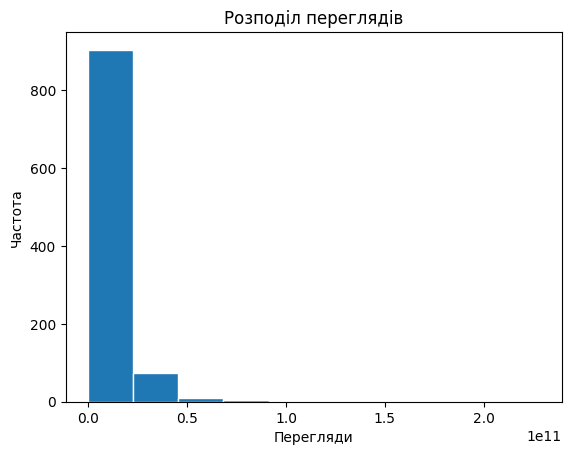

In [11]:
df['video views'].plot(kind='hist', edgecolor='white')
plt.xlabel('Перегляди')
plt.ylabel('Частота')
plt.title('Розподіл переглядів')
plt.show()

8. Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean)

In [12]:
df['video views'].max()

228000000000.0

In [13]:
df['video views'].min()

0.0

In [14]:
df['video views'].mean()

np.float64(11039537052.03819)

9. Знайдіть країну, де найбільше відео було завантажено на YouTube

In [15]:
df.loc[df['uploads'].idxmax()]['Country']

'India'

10. Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads

In [16]:
df[df['uploads'] == df['uploads'].max()].iloc[0]['Title']

'ABP NEWS'

In [17]:
df[df['uploads'] == df['uploads'].min()].iloc[0]['Title']

'Music'

**Завдання 2**

Зчитати архів Customer Shopping Trends Dataset.

Далі працюємо з файлом shopping_trends.csv

Загрузіть цей файл. Перевірте розмір таблиці, наявність пропусків, тип
стовпців. Перейменуйте назви стовпців: Змініть прописні букви на строчні
(маленькі) та пробіл на підкреслення.



In [18]:
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends.csv


In [19]:
df = pd.read_csv('shopping_trends.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [20]:
df.shape

(3900, 19)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [22]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [23]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


Далі виконайте наступні завдання. Побудуйте графіки з використанням
бібліотеки seaborn.

Гістограма віку (age):
1. Побудуйте гістограму віку клієнтів, використовуючи Seaborn.

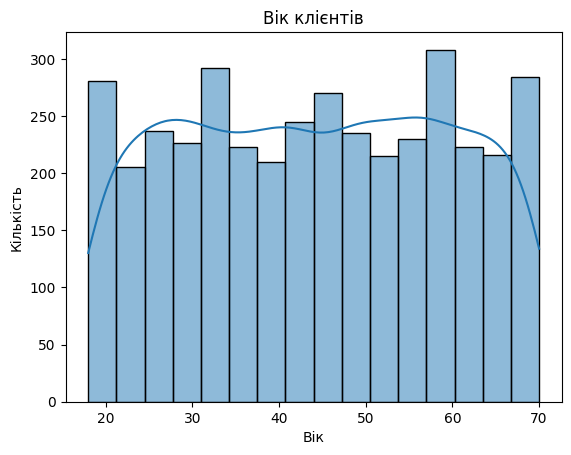

In [24]:
sns.histplot(data = df, x = 'age', kde = True)
plt.title('Вік клієнтів')
plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.show()

Порівняння розподілу покупок за статтею (item_purchased):
2. Створіть стовпчасту діаграму або графік розподілу, щоб порівняти, які
товари покупають клієнти найчастіше.

<ipython-input-25-7bcc408ca8de>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, y = 'item_purchased',


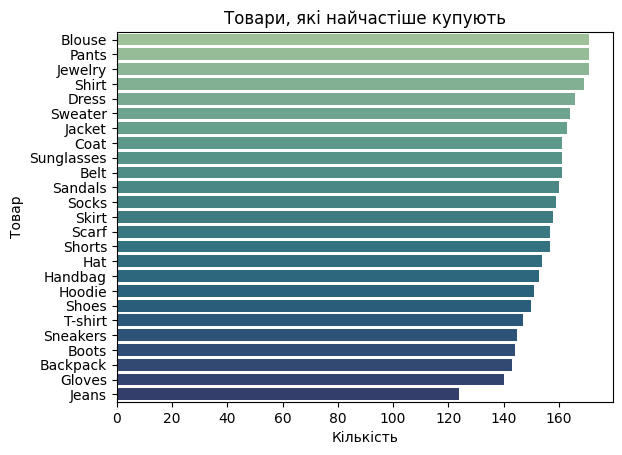

In [25]:
sns.countplot(data = df, y = 'item_purchased',
              order = df['item_purchased'].value_counts().index,
              palette='crest')
plt.title('Товари, які найчастіше купують')
plt.xlabel('Кількість')
plt.ylabel('Товар')
plt.show()

Залежність між віком та сумою покупок (purchase_amount):
3. Використовуйте scatter plot, щоб візуалізувати залежність між віком та
сумою покупок.

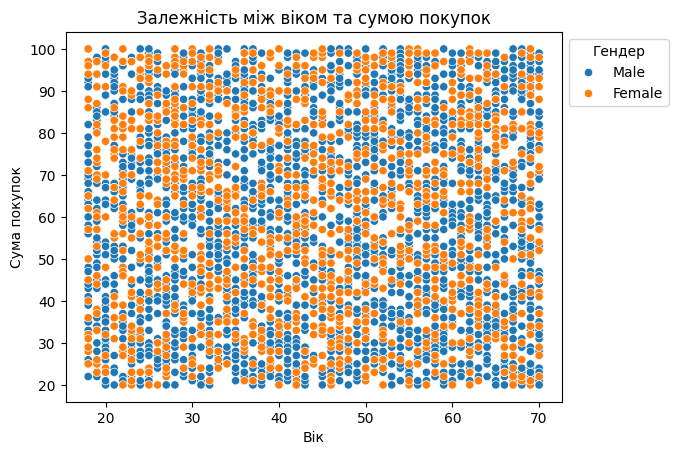

In [26]:
sns.scatterplot(data = df, x = 'age', y = 'purchase_amount_(usd)',
                hue = 'gender')
plt.title('Залежність між віком та сумою покупок')
plt.xlabel('Вік')
plt.ylabel('Сума покупок')
plt.legend(title = 'Гендер', bbox_to_anchor = (1, 1), loc='upper left')
plt.show()

Графік розподілу оцінок товарів (review_rating):
4. Побудуйте графік розподілу оцінок товарів для оцінки якості.

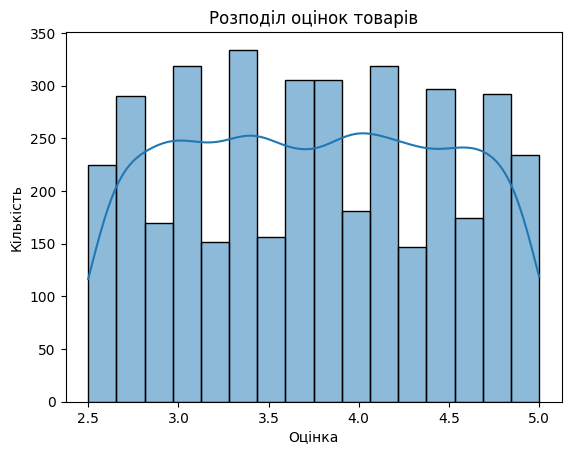

In [27]:
sns.histplot(data = df, x = 'review_rating', kde = True)
plt.title('Розподіл оцінок товарів')
plt.xlabel('Оцінка')
plt.ylabel('Кількість')
plt.show()

Категоріальна діаграма для статі (gender):
5. Створіть категоріальну діаграму, щоб відобразити розподіл покупок за
статтею.

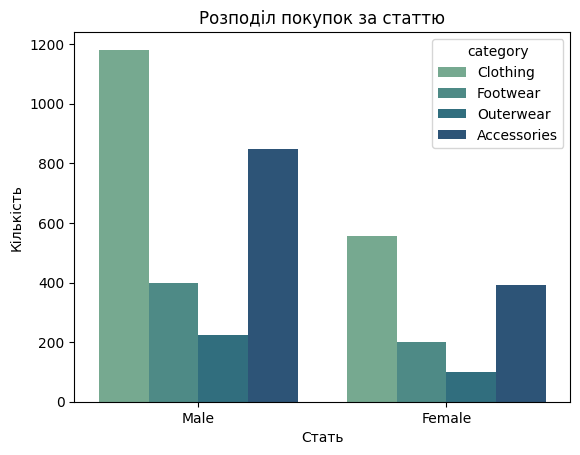

In [28]:
sns.countplot(data = df, x = 'gender', hue = 'category', palette = 'crest')
plt.title('Розподіл покупок за статтю')
plt.xlabel('Стать')
plt.ylabel('Кількість')
plt.show()

6. Залежність між рейтингом і сумою покупок (review_rating і
purchase_amount)

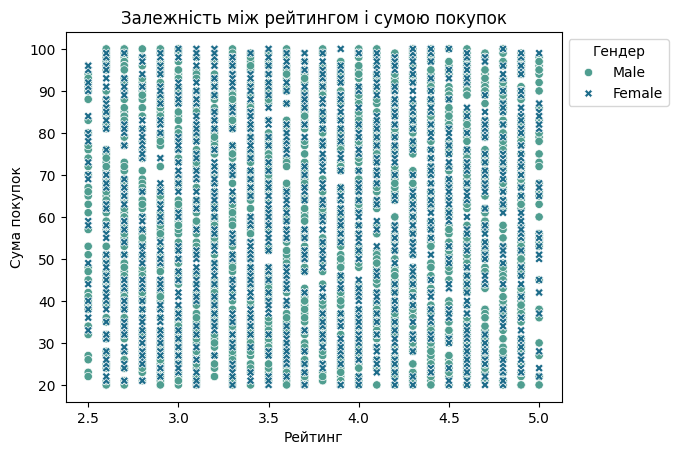

In [29]:
sns.scatterplot(data = df, x = 'review_rating', y = 'purchase_amount_(usd)',
                hue = 'gender', style = 'gender', palette = 'crest')
plt.title('Залежність між рейтингом і сумою покупок')
plt.xlabel('Рейтинг')
plt.ylabel('Сума покупок')
plt.legend(title = 'Гендер', bbox_to_anchor = (1, 1), loc='upper left')
plt.show()

**Завдання 3**
1. Створіть горизонтальну діаграму з мітками на основі даних про
врожайність пшениці (data.wheat()) за допомогою бібліотеки Altair.
Задайте вісь x для врожайності пшениці, вісь y для років, а текстові
мітки відображайте значення врожайності пшениці на відповідних
роках.

In [30]:
source = data.wheat()

base = alt.Chart(source).encode(
    x='wheat',
    y="year:O",
    text='wheat'
)

base.mark_bar() + base.mark_text(align='left', dx=2
).properties(
    title='Врожайність пшениці по роках',
    width=700,
    height=700
)

alt.LayerChart(...)

2. Створіть багатошарову діаграму на основі даних про виробництво
електроенергії в штаті Айова (data.iowa_electricity()) за допомогою
бібліотеки Altair . Вісь x представляє роки, вісь y відображає чисте
виробництво електроенергії (net_generation), а кожен шар діаграми
позначає різні джерела енергії (source). Встановіть прозорість (opacity)
для стовпців на рівні 0.7.

In [31]:
source = data.iowa_electricity()

alt.Chart(source).mark_bar(opacity=0.7).encode(
    x='year:O',
    y=alt.Y('net_generation:Q').stack(None),
    color=alt.Color('source:N', scale=alt.Scale(scheme='viridis')),
).properties(
    title='Виробництво електроенергії в штаті Айова',
    width=700,
)

alt.Chart(...)

3. Створіть графік за допомогою бібліотеки Plotly (scatter plot) для даних
ірисів (iris dataset), де:
Вісь X (x-axis) відповідає ширині чашелистика (sepal width).
Вісь Y (y-axis) відповідає довжині чашелистика (sepal length).
Кожен пункт на графіку має розмір, який залежить від довжини
пелюстки (petal length).
Кожен пункт на графіку має різний колір в залежності від виду
(species).
При наведенні на пункт повинні відображатися додаткові дані, такі як
ширина пелюстки (petal width)

In [32]:
df = px.data.iris()

px.scatter(df, x='sepal_width', y='sepal_length', size='petal_length',
                 color='species', hover_data=['petal_width'],
                 title="Графік")